In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install scikit-learn==1.0.0
#pip install statsmodels==0.12.2

In [3]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS" #NSE stocks usually end with .NS
# Download stock data
stk_data = yf.download(stock_symbol, start="2023-01-01", end="2023-07-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
stk_data

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-01-02,1180.586060,1182.006865,1167.890577,1168.715541,5316175
2023-01-03,1171.946655,1179.256896,1167.707271,1175.613232,7658932
2023-01-04,1154.301392,1173.780010,1152.216007,1171.923749,9264891
2023-01-05,1152.239014,1162.482516,1147.632911,1156.570169,13637099
2023-01-06,1162.711548,1167.776018,1154.186834,1158.013796,6349597
...,...,...,...,...,...
2023-06-23,1152.559814,1161.107441,1151.299395,1159.044969,6628570
2023-06-26,1143.760010,1152.857653,1140.620538,1149.007778,12641159


In [5]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [6]:
stk_data

Price,Open,High,Low,Close
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,
2023-01-02,1168.715541,1182.006865,1167.890577,1180.586060
2023-01-03,1175.613232,1179.256896,1167.707271,1171.946655
2023-01-04,1171.923749,1173.780010,1152.216007,1154.301392
2023-01-05,1156.570169,1162.482516,1147.632911,1152.239014
2023-01-06,1158.013796,1167.776018,1154.186834,1162.711548
...,...,...,...,...
2023-06-23,1159.044969,1161.107441,1151.299395,1152.559814
2023-06-26,1149.007778,1152.857653,1140.620538,1143.760010


In [7]:
column="Close"

In [8]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (122, 1)


In [9]:
len(data1)

122

In [10]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

98
X_train length: (98, 1)
X_test length: (24, 1)
y_train length: (98, 1)
y_test length: (24, 1)


In [11]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.2070626665207491
maPe-Testset: 0.2043742322878015
************
Lag=1,Trend=t
RMSE-Testset: 0.08729801424859447
maPe-Testset: 0.102028775207289
************
Lag=1,Trend=c
RMSE-Testset: 0.24387800830193843
maPe-Testset: 0.24688745459154182
************
Lag=1,Trend=ct
RMSE-Testset: 0.07808401727862306
maPe-Testset: 0.08950085614850815
************
Lag=2,Trend=n
RMSE-Testset: 0.19783625363912632
maPe-Testset: 0.19468330062954875
************
Lag=2,Trend=t
RMSE-Testset: 0.09111683385915659
maPe-Testset: 0.10545464221190559
************
Lag=2,Trend=c
RMSE-Testset: 0.24683204847697474
maPe-Testset: 0.24965382017278437
************
Lag=2,Trend=ct
RMSE-Testset: 0.08151904009651466
maPe-Testset: 0.09038139418126794
************
Lag=3,Trend=n
RMSE-Testset: 0.17269209063896995
maPe-Testset: 0.1700311075006451
************
Lag=3,Trend=t
RMSE-Testset: 0.09011841416571721
maPe-Testset: 0.10445722808992719
************
Lag=3,Trend=c
RMSE-Testset: 0.2316944923471746
maPe-T

In [12]:
len(y_pred)

24

In [13]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=ct
RMSE-Testset: 0.07808401727862306
maPe-Testset: 0.08950085614850815
************


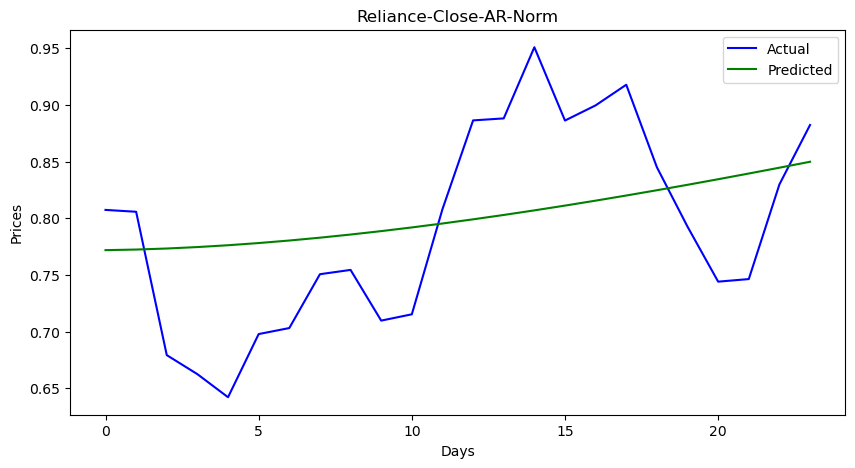

In [14]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Reliance-Close-AR-Norm","Days","Prices")

In [15]:
len(data1)

122

In [16]:
y_test

array([[0.80735748],
       [0.80571384],
       [0.67918075],
       [0.66236857],
       [0.64201726],
       [0.69776317],
       [0.70307185],
       [0.75060155],
       [0.75439318],
       [0.70964509],
       [0.71520695],
       [0.80798976],
       [0.88636087],
       [0.88813111],
       [0.95095526],
       [0.88623496],
       [0.89963393],
       [0.91783658],
       [0.84502599],
       [0.79256804],
       [0.74402765],
       [0.74630357],
       [0.82985812],
       [0.88231674]])

In [17]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [18]:
aTestNormTable

,Close
0,0.807357
1,0.805714
2,0.679181
3,0.662369
4,0.642017
5,0.697763
6,0.703072
7,0.750602
8,0.754393
9,0.709645


In [19]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [20]:
actual_stock_price_test_ori

array([[1155.2409668 ],
       [1154.94299316],
       [1132.00402832],
       [1128.95617676],
       [1125.26672363],
       [1135.37280273],
       [1136.33520508],
       [1144.95178223],
       [1145.63916016],
       [1137.52685547],
       [1138.53515625],
       [1155.35559082],
       [1169.56335449],
       [1169.88427734],
       [1181.27355957],
       [1169.54052734],
       [1171.96960449],
       [1175.26953125],
       [1162.06982422],
       [1152.55981445],
       [1143.76000977],
       [1144.17260742],
       [1159.32006836],
       [1168.8302002 ]])

In [21]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [22]:
actual_stock_price_test_oriA

,Close
0,1155.240967
1,1154.942993
2,1132.004028
3,1128.956177
4,1125.266724
5,1135.372803
6,1136.335205
7,1144.951782
8,1145.63916
9,1137.526855


In [23]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [24]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

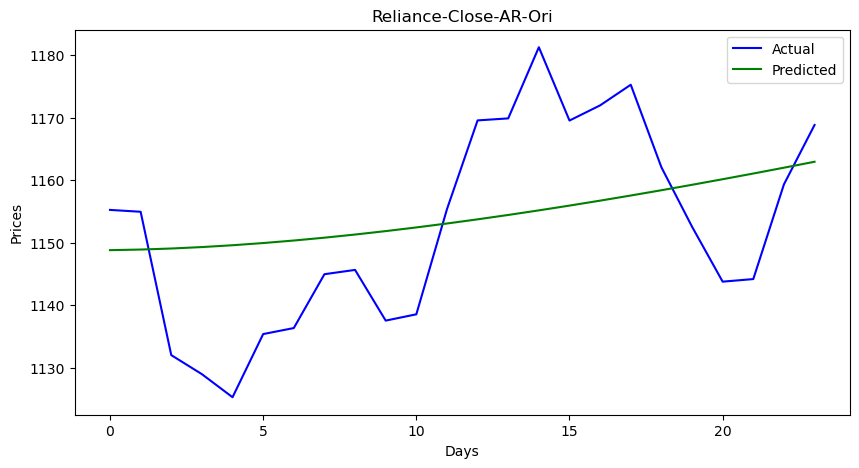

In [25]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-Close-AR-Ori","Days","Prices")

In [26]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 14.155716332362843
maPe-Testset: 0.01089477228823032


In [27]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [28]:
forecast

array([0.85520273, 0.86063445, 0.86615076, 0.8717465 ])

In [29]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [30]:
forecast_stock_price_test_oriF

,Closefore
0,1163.914749
1,1164.899455
2,1165.899498
3,1166.913941


In [31]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

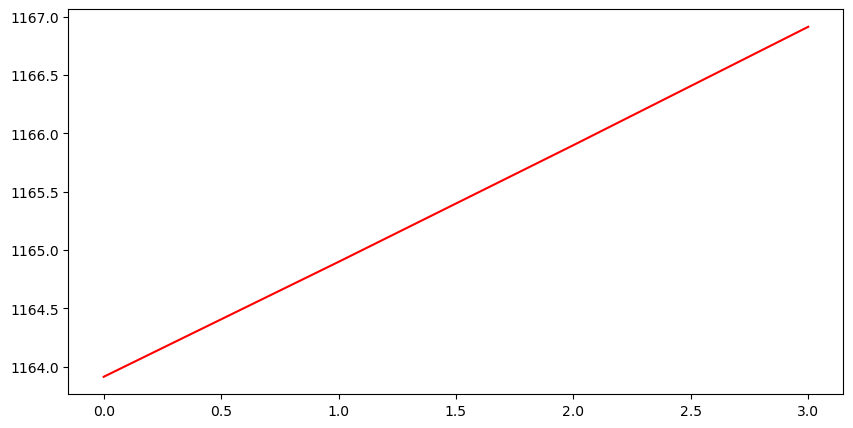

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")